***
# Multiple Output Model :
 Predicting wine quality and wine type (two outpust) with one DNN using keras

***

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import utils

In [2]:
##Upload csv data

from google.colab import files

data = files.upload()

Saving winequality-white.csv to winequality-white.csv


In [10]:
### White wine

white_df = pd.read_csv('winequality-white.csv', sep=';')

pd.set_option('display.max_columns', None)

white_df["is_red"] = 0


white_df = white_df.drop_duplicates(keep='first')

white_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0


In [11]:
### Red wine


red_df = pd.read_csv('winequality-red.csv', sep=';')

pd.set_option('display.max_columns', None)

red_df["is_red"] = 1


red_df = red_df.drop_duplicates(keep='first')

red_df.head(5)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [13]:
## Put the the together 

wine_df = pd.concat([red_df, white_df], ignore_index=True) 
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [48]:
# Just the quality between  4 and 8
wine_df = wine_df[(wine_df['quality'] > 4) & (wine_df['quality'] < 8 )]

# reset index and drop the old one
wine_df = wine_df.reset_index(drop=True)



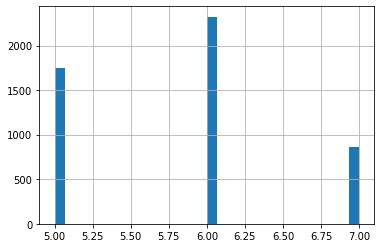

In [49]:
### visual

wine_df['quality'].hist(bins=30)

***
# Split the data
***

In [50]:

train, test = train_test_split(wine_df, test_size=.20, random_state =1)
                               
## Validation split as well


train, val = train_test_split(train, test_size= 0.2, random_state =1)


In [51]:
### Exploring the data 

train_stats = train.describe()

train_stats.pop('is_red')
train_stats.pop('quality')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.221616,1.325297,3.80000,6.40000,7.00000,7.7000,15.60000
volatile acidity,3155.0,0.338929,0.162476,0.08000,0.23000,0.29000,0.4000,1.24000
citric acid,3155.0,0.321569,0.147970,0.00000,0.25000,0.31000,0.4000,1.66000
residual sugar,3155.0,5.155911,4.639632,0.60000,1.80000,2.80000,7.6500,65.80000
chlorides,3155.0,0.056976,0.036802,0.01200,0.03800,0.04700,0.0660,0.61100
free sulfur dioxide,3155.0,30.388590,17.236784,1.00000,17.00000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,115.062282,56.706617,6.00000,75.00000,117.00000,156.0000,344.00000
density,3155.0,0.994633,0.003005,0.98711,0.99232,0.99481,0.9968,1.03898
pH,3155.0,3.223201,0.161272,2.72000,3.11000,3.21000,3.3300,4.01000
sulphates,3155.0,0.534051,0.149149,0.22000,0.43000,0.51000,0.6000,1.95000


In [52]:
### I will get the Y labels and X features separted in the next cells

def format_output(data):
    is_red = data.pop('is_red')
    is_red = np.array(is_red)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, is_red)

In [53]:
train_Y = format_output(train)


val_Y = format_output(val)
    

test_Y = format_output(test)

In [54]:
### Normalize the X features as well (between 0 and 1)

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


norm_train_X = norm(train)
    

norm_val_X = norm(val)
    

norm_test_X = norm(test)

norm_test_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2372,-0.242675,-0.670428,-0.551254,1.949312,-0.108035,-0.660714,-0.371425,1.187100,-0.329886,-0.228299,-0.783322
1900,-0.469039,-0.793523,-0.078184,1.345815,-0.488447,0.905703,0.880633,1.103907,1.158285,-0.630581,-0.610110
275,1.266420,0.560521,0.867954,-0.701761,-0.135207,-1.414915,-1.746926,0.055672,0.786243,1.112638,1.728253
3276,-0.619949,2.099207,-0.416091,-0.378459,0.326722,-0.312622,0.545575,-0.386917,-0.267879,-0.898768,-1.043140
2360,-0.469039,-0.670428,-0.416091,-0.831081,-0.325413,-0.834761,0.228152,-0.410211,0.848250,0.442169,-0.436898


****
# Train the model 

******

In [55]:

inputs = Input(shape=(11,))
x = Dense(128, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)

wine_quality = Dense(1, name='wine_quality')(x)

wine_type = Dense(1, activation='sigmoid', name='wine_type')(x)


model = Model(inputs=inputs, outputs=[(wine_quality, wine_type)])

model.summary()



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 128)          1536        ['input_3[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 128)          16512       ['dense_4[0][0]']                
                                                                                                  
 wine_quality (Dense)           (None, 1)            129         ['dense_5[0][0]']                
                                                                                            

In [56]:
### Compile the model

rms_prop = tf.keras.optimizers.RMSprop(lr=0.0001)


model.compile(optimizer = rms_prop, 
              loss = {'wine_type' : 'binary_crossentropy',
                      'wine_quality' : 'mean_squared_error'
                     },
              metrics = {'wine_type' : 'accuracy',
                         'wine_quality': tf.keras.metrics.RootMeanSquaredError()
                       }
             )


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [60]:
### Training the model



history = model.fit(norm_train_X, train_Y, 
                    epochs = 40, validation_data=(norm_val_X, val_Y))

In [ ]:
## Evaluate the mode;

loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

In [ ]:
### Make predictions

predictions = model.predict(norm_test_X)
quality_pred = predictions[0]
type_pred = predictions[1]

